# Keyphrase Extraction in multi-documents accounting with geospacial associations

This is a exploratory notebook.

In [2]:
import os

import joblib
import pandas as pd
from nltk.stem import PorterStemmer
import simplemma

import pandas as pd
import umap
import umap.plot

# Some plotting libraries
import matplotlib.pyplot as plt

from geo_kpe_multidoc import (GEO_KPE_MULTIDOC_CACHE_PATH,
                              GEO_KPE_MULTIDOC_OUTPUT_PATH)
from geo_kpe_multidoc.models.pre_processing.pre_processing_utils import \
    lemmatize


2023-04-26 17:04:47.377016: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 17:04:47.527066: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-26 17:04:47.527093: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-26 17:04:48.566150: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [27]:
embds = joblib.load("/home/helder/doc/mecd/thesis/code/geo-kpe-multidoc/AP830325-0143-candidate-embeddings.pkl")
gold_kp = joblib.load("/home/helder/doc/mecd/thesis/code/geo-kpe-multidoc/AP830325-0143-gold-kp.pkl")

In [14]:
doc_id, doc_embed, candidates , candidate_embeddings= embds
candidate_embeddings.append(doc_embed)

In [29]:
gold_kp

('AP830325-0143',
 ['u.s. tanker spill',
  '987-foot tanker exxon valdez',
  'oil spill',
  'major environmental catastrophe',
  'cleanup equipment',
  'crude oil',
  'cleanup efforts',
  'alaska'],
 ['u s tanker spill',
  '987-foot tanker exxon valdez',
  'oil spill',
  'major environmental catastrophe',
  'cleanup equipment',
  'crude oil',
  'cleanup effort',
  'alaska'])

In [32]:
lemmer = "en"
stemmer = PorterStemmer()
def stem_phrase(phrase, stemmer):
    return " ".join(
        [stemmer.stem(w) for w in simplemma.simple_tokenizer(phrase)]
    ).lower()

gold_kp = [stem_phrase(kp, stemmer) for kp in gold_kp[1]]

in_gold = [(stem_phrase(candidate, stemmer) in gold_kp) for candidate in candidates]


In [24]:
embedding = umap.UMAP(n_components=2).fit(candidate_embeddings)

In [22]:
embedding.embedding_.shape

(183, 2)

In [33]:
category_labels = [ "in_gold" if x else "candidate" for x in in_gold] + ["doc"]
hover_df = pd.DataFrame(category_labels, columns=['category'])

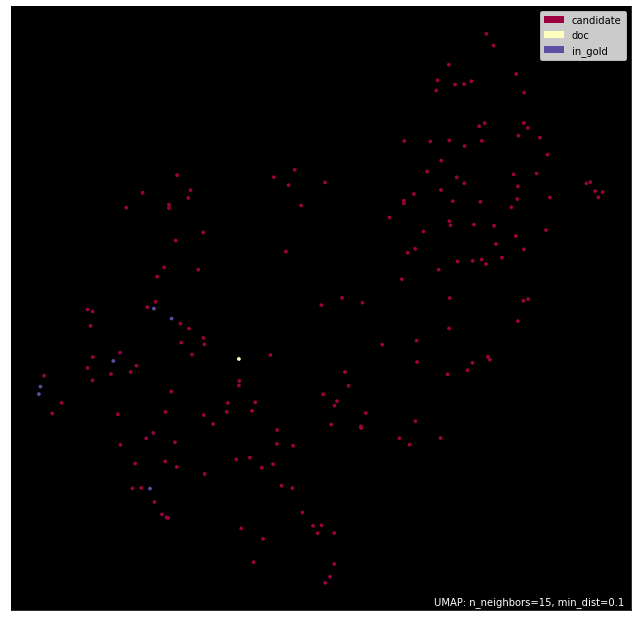

In [35]:
f = umap.plot.points(embedding, labels=hover_df['category'], background='black')

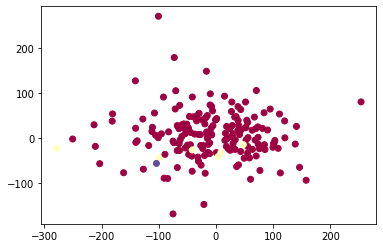

In [44]:
category_labels = [ 1 if x else 0 for x in in_gold] + [2]
hover_df = pd.DataFrame(category_labels, columns=['category'])

sphere_mapper = umap.UMAP(output_metric='haversine', random_state=42).fit(candidate_embeddings)
plt.scatter(sphere_mapper.embedding_.T[0], sphere_mapper.embedding_.T[1], c=hover_df['category'], cmap='Spectral')